In [ ]:
!pip install --upgrade pillow

#Restart after running the above cell.

In [ ]:
!gdown https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk

Downloading...
From: https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk
To: /content/UTKFace.tar.gz
107MB [00:01, 100MB/s]  


In [ ]:
!tar -xzvf UTKFace.tar.gz

In [ ]:
#There are too many images of Caucasian people in this dataset.  We need to reduce the number so the training will not be biased.
import os
import random
directory = "/content/UTKFace/"

white_images = []
removed = 0

for file in os.listdir(directory):

    if str(file)[-32] == '0':
      white_images.append(file)

print(white_images)

for i in range(10076):
  try:
    remove_idx = random.randint(0,len(white_images))
    print(remove_idx)
    img_to_remove = white_images[remove_idx]
    print(img_to_remove)
    os.remove(directory+img_to_remove)
    removed+=1
    print("removed: ",removed)
  except:
    pass

In [ ]:
#This code converts all images to greyscale for averaging.
import os
import cv2
from google.colab.patches import cv2_imshow

directory = '/content/UTKFace/'

for file in os.listdir(directory):
  print(file)

  image = cv2.imread("/content/UTKFace/" + file)
  image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2.imwrite("/content/UTKFace/" + file, image_grey)

In [ ]:
#@title Do you want to increase brightness of photos of persons of African descent by 26% ?


increase_brightness = "No"  #@param ['Yes', 'No']



In [ ]:
# This will increase the brightness of all images of people of African descent, by 26%
# Don't run this cell if you want to see how the original dataset looks.
from PIL import Image, ImageEnhance
import os
import cv2
from google.colab.patches import cv2_imshow

directory = '/content/UTKFace/'

for file in os.listdir(directory):
  
  if str(file)[-32] == '1' and increase_brightness=='Yes':

    print(file)
  
    im = Image.open(r"/content/UTKFace/" + file)

    im3 = ImageEnhance.Brightness(im)
    im3.enhance(1.26).save("/content/UTKFace/" + file)

In [ ]:
import os
from skimage import io
import numpy as np

directory = "/content/UTKFace/"

white_mean_tot = 0
black_mean_tot = 0
asian_mean_tot = 0
indian_mean_tot = 0
other_mean_tot = 0

white_img_count = 0
black_img_count = 0
asian_img_count = 0
indian_img_count = 0
other_img_count = 0

white_mean_list = []
black_mean_list = []
asian_mean_list = []
indian_mean_list = []
other_mean_list = []

for file in os.listdir(directory):
    image = io.imread("/content/UTKFace/" + file)
    image_mean = np.mean(image)

    if str(file)[-32] == '0':
      
      white_mean_tot = white_mean_tot + image_mean
      white_img_count = white_img_count + 1
      white_mean_list.append(int(image_mean))
    
    if str(file)[-32] == '1':
      black_mean_tot = black_mean_tot + image_mean
      black_img_count = black_img_count + 1
      black_mean_list.append(int(image_mean))

    if str(file)[-32] == '2':
      asian_mean_tot = asian_mean_tot + image_mean
      asian_img_count = asian_img_count + 1
      asian_mean_list.append(int(image_mean))

    if str(file)[-32] == '3':
      indian_mean_tot = indian_mean_tot + image_mean
      indian_img_count = indian_img_count +1
      indian_mean_list.append(int(image_mean))
    
    if str(file)[-32] == '4':
      other_mean_tot = other_mean_tot + image_mean
      other_img_count = other_img_count + 1
      other_mean_list.append(int(image_mean))

print("white_mean_tot")
print(white_mean_tot)
print("black_mean_tot")
print(black_mean_tot)
print("asian_mean_tot")
print(asian_mean_tot)
print("indian_mean_tot")
print(indian_mean_tot)
print("other_mean_tot")
print(other_mean_tot)


white_mean_tot
486114.2318500001
black_mean_tot
470636.58182500023
asian_mean_tot
464647.1501250005
indian_mean_tot
489218.6619499994
other_mean_tot
208556.58739999967


In [ ]:
import pandas as pd

df_list=[]

for i in white_mean_list:
  df_list.append([i,'white'])

for i in black_mean_list:
  df_list.append([i,'black'])

for i in asian_mean_list:
  df_list.append([i,'asian'])

for i in indian_mean_list:
  df_list.append([i,'indian'])

for i in other_mean_list:
  df_list.append([i,'other'])

df = pd.DataFrame(df_list, columns=['px_vals','Color'])

print(df)



       px_vals  Color
0          109  white
1          111  white
2          125  white
3           93  white
4          147  white
...        ...    ...
17291      103  other
17292      148  other
17293       97  other
17294       87  other
17295      144  other

[17296 rows x 2 columns]


In [ ]:
import seaborn as sns

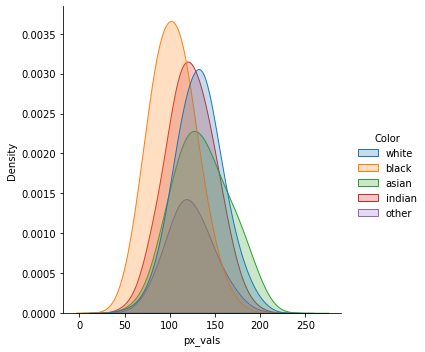

In [ ]:
sns.displot(df, x="px_vals", hue="Color",kind="kde", bw_adjust=2,fill=True)

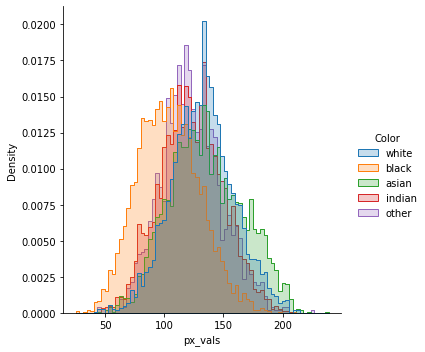

In [ ]:
sns.displot(df, x="px_vals", hue="Color", stat="density",element="step",common_norm=False,)

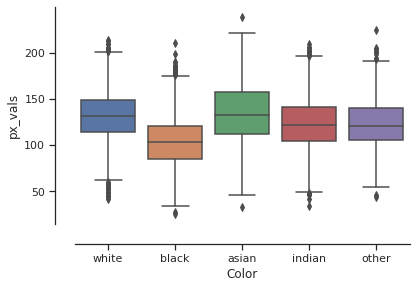

In [ ]:
sns.set_theme(style="ticks")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Color", y="px_vals",
            data=df)
sns.despine(offset=20, trim=False)

In [ ]:
all_pixel_averages = white_mean_tot + black_mean_tot + asian_mean_tot + indian_mean_tot + other_mean_tot

print("white %")
print(white_mean_tot/all_pixel_averages)
print("black %")
print(black_mean_tot/all_pixel_averages)
print("asian %")
print(asian_mean_tot/all_pixel_averages)
print("indian %")
print(indian_mean_tot/all_pixel_averages)
print("other %")
print(other_mean_tot/all_pixel_averages)

white %
0.2293886261083047
black %
0.2220849994255224
asian %
0.21925869355168734
indian %
0.23085355124077406
other %
0.09841412967371135


In [ ]:
print('white average pixel average')
print(white_mean_tot/white_img_count)
print('black average pixel average')
print(black_mean_tot/black_img_count)
print('asian average pixel average')
print(asian_mean_tot/asian_img_count)
print('indian average pixel average')
print(indian_mean_tot/indian_img_count)
print('other average pixel average')
print(other_mean_tot/other_img_count)


white average pixel average
132.492295407468
black average pixel average
103.96213426662254
asian average pixel average
135.34726190649593
indian average pixel average
123.07387722012564
other average pixel average
123.26039444444424


#Results:

*   White images are on average 132 (avg pixel value)

*   Asian images have an average pixel brightness of 135

*   Indian images have an average pixel brightness of 123

*   Other images have an average pixel brightness of 123

*   Black images have an average pixel brightness of 103



#Percentage Difference:
Using White as a baseline:

*   Asian is + 2%

*   Indian is - 7%

*   Other is - 7%

*   Black is - 22%


Faces in the 'Black' category are 22% darker than White faces, and 15% darker than their nearest neighbors, Indian and Other.  Training using this dataset is likely to lead to bias, as the model will be well-trained on the lighter images and poorly trained on the images of persons of African descent.

UTK Face Dataset: http://aicip.eecs.utk.edu/wiki/UTKFace